In [1]:
from cmath import cos
from math import radians, sin, cos, pi
import os, os.path
from re import L
from statistics import mean
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from utilsV2 import loadFiles, addTorque, filterEMG, slidingWindow, featureExtraction, stackFiles
from emgFeatures import rms
from scipy.signal import butter, lfilter
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
path = 'D:\Documentos\Datasets\Grabaciones 5'

files = loadFiles(path)

In [3]:
torqueFiles = addTorque(files)

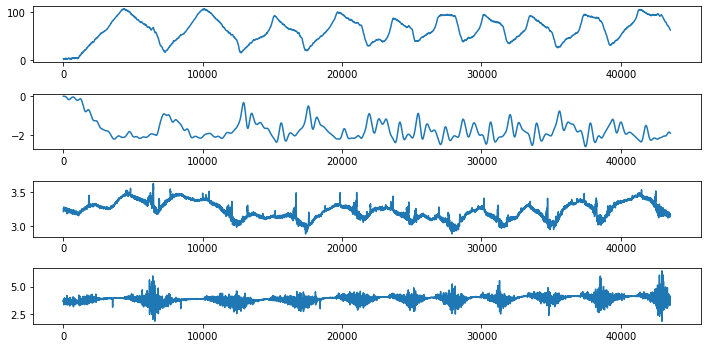

In [4]:
subject = 'subject 1'
test = '1_ext_0_0'

fig, axs = plt.subplots(4, figsize=(10,5))
fig.tight_layout()

angle = torqueFiles[subject][test][:,4]
torque = torqueFiles[subject][test][:,5]
emg = torqueFiles[subject][test][:,0:4]

axs[0].plot(angle)
axs[1].plot(torque)
axs[2].plot(emg[:,0])
axs[3].plot(emg[:,1])

In [5]:
filteredFiles = filterEMG(torqueFiles, 500, 5, 1024)

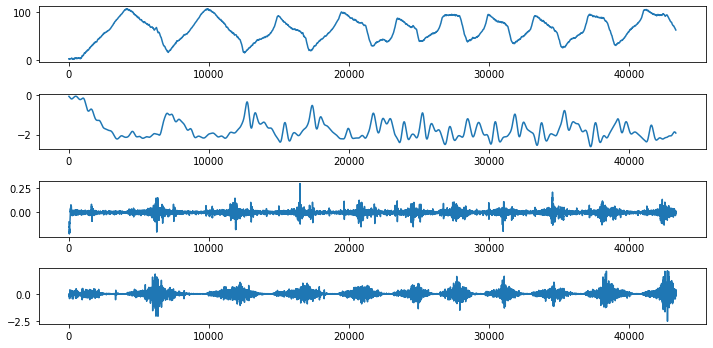

In [6]:
fig, axs = plt.subplots(4, figsize=(10,5))
fig.tight_layout()

angle = filteredFiles[subject][test][:,4]
torque = filteredFiles[subject][test][:,5]
emg = filteredFiles[subject][test][:,0:4]

axs[0].plot(angle)
axs[1].plot(torque)
axs[2].plot(emg[:,0])
axs[3].plot(emg[:,1])

In [7]:
segmentedFiles = slidingWindow(filteredFiles, 200, 100)

In [8]:
featuresFiles = featureExtraction(segmentedFiles)

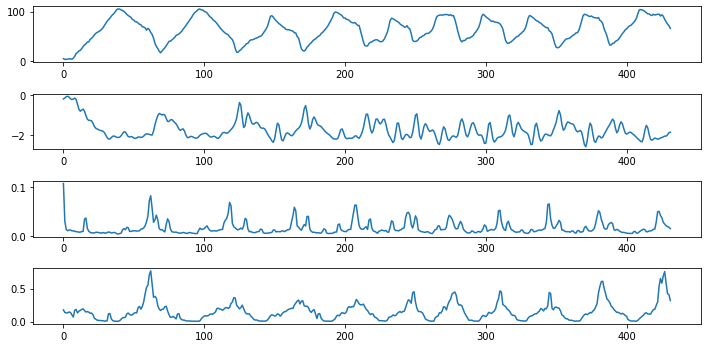

In [9]:
fig, axs = plt.subplots(4, figsize=(10,5))
fig.tight_layout()

angle = featuresFiles[subject][test][1]
torque = featuresFiles[subject][test][2]
emg = featuresFiles[subject][test][0]

axs[0].plot(angle)
axs[1].plot(torque)
axs[2].plot(emg[:,0])
axs[3].plot(emg[:,1])

In [10]:
np.array(featuresFiles['subject 1']['1_flex_0_0'][1]).shape

(640,)

In [11]:
emgData, angleData, torqueData = stackFiles(featuresFiles)

In [12]:
print(emgData.shape)
print(angleData.shape)
print(torqueData.shape)

(9016, 4)
(9016, 1)
(9016, 1)


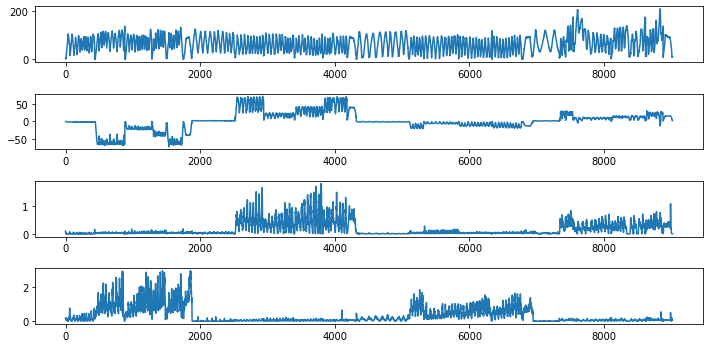

In [13]:
fig, axs = plt.subplots(4, figsize=(10,5))
fig.tight_layout()


axs[0].plot(angleData)
axs[1].plot(torqueData)
axs[2].plot(emgData[:,0])
axs[3].plot(emgData[:,1])

In [29]:
lr = RandomForestRegressor()
lr.fit(emgData[:,0:2],np.ravel(torqueData))

RandomForestRegressor()

Train R2 =  0.8216649647110565
Train MAE =  6.505185946208474


Text(0.5, 0, 'Ventana')

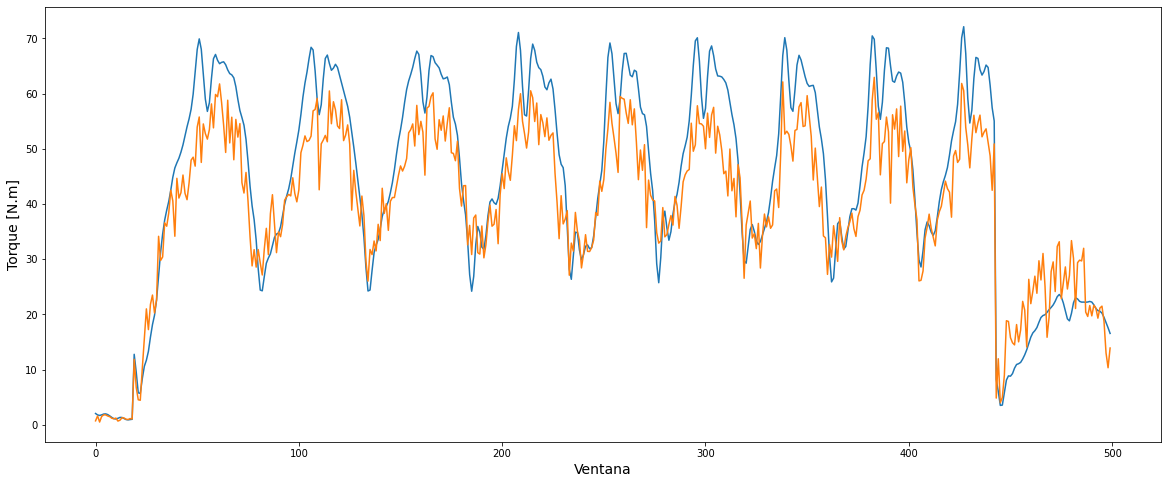

In [30]:
i = 2500
n = 3000

predicted = lr.predict(emgData[i:n,0:2])
#predicted = filter(predicted,8,1/0.05)
print("Train R2 = ", r2_score(np.ravel(torqueData)[i:n], predicted))
print("Train MAE = ", mean_absolute_error(np.ravel(torqueData)[i:n], predicted))

plt.figure(figsize=(20,8))
plt.plot(np.ravel(torqueData)[i:n])
plt.plot(predicted)
plt.ylabel("Torque [N.m]", fontsize=14)
plt.xlabel("Ventana", fontsize=14)